# Data Mining Project 3: Clustering

MSDS 7331 - Section 403 | Team Members: Sabitri KC, Rob Rivens, Andrew Walch

## Business Understanding

#### We chose to analyze a data set called "Diabetes 130-US Hospitals", which contains data collected on Diabetes patients for years 1999-2008. The data was prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes.  We felt this would be an interesting Classification problem, as we have prior knowledge that Diabetes affects some people of certain racial ethnicities more than others.  We also thought looking at factors related to readmission could be related to other factors such as other illnesses, number of medications being taken or age.  We will measure the success of our algorithm by assessing the objective function, which is minimizing the Sum of Squared Errors (SSE).  We will perform cross-validation to also assess the accuracy of our algorith and chosen methods.



## Data Understanding

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

- It is an inpatient encounter (a hospital admission)
- 	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
- 	The length of stay was at least 1 day and at most 14 days.
- 	Laboratory tests were performed during the encounter.
- 	Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.




## Data Structure

There were 55 attributes and 101,766 observations in the datset described as follows:

Feature Name, Type, Description and Range of Values, % Missing Data

Patient Data
- Encounter ID	Numeric	Unique identifier of an encounter	0%
- Patient number	Numeric	Unique identifier of a patient	0%
- Race	Nominal	Values: Caucasian, Asian, African American, Hispanic, and other	2%
- Gender	Nominal	Values: male, female, and unknown/invalid	0%
- Age	Nominal	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)	0%
- Weight	Numeric	Weight in pounds.	97%

Admission/Hospital Stay Data
- Admission type	Nominal	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available	0%
- Discharge disposition	Nominal	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available	0%
- Admission source	Nominal	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital	0%
- Time in hospital	Numeric	Integer number of days between admission and discharge	0%

Financial Data
- Payer code	Nominal	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay	52%

Medical Procedure/Drug Data
- Medical specialty	Nominal	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon	53%
- Number of lab procedures	Numeric	Number of lab tests performed during the encounter	0%
- Number of procedures	Numeric	Number of procedures (other than lab tests) performed during the encounter	0%
- Number of medications	Numeric	Number of distinct generic names administered during the encounter	0%
- Number of outpatient visits	Numeric	Number of outpatient visits of the patient in the year preceding the encounter	0%
- Number of emergency visits	Numeric	Number of emergency visits of the patient in the year preceding the encounter	0%
- Number of inpatient visits	Numeric	Number of inpatient visits of the patient in the year preceding the encounter	0%
- Diagnosis 1	Nominal	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values	0%
- Diagnosis 2	Nominal	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values	0%
- Diagnosis 3	Nominal	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values	1%
- Number of diagnoses	Numeric	Number of diagnoses entered to the system	0%
- Glucose serum test result	Nominal	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured	0%
- A1c test result	Nominal	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.	0%
- Change of medications	Nominal	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”	0%
- Diabetes medications	Nominal	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”	0%
- 24 features for medications	Nominal	For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed	0%

Readmission Data
- Readmitted	Nominal	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.	0%

## Getting Started

In [1]:
#import libraries
import scipy
import bottleneck # for speeding up pandas operations
import numexpr # ditto
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Mining / EDA / dimensionality reduction
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import scale
from scipy.spatial.distance import euclidean

# Supervised learning
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Unsupervised learning
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib.colors import ListedColormap

%matplotlib inline
rng = np.random.RandomState(1)

/Users/yupster2/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yupster2/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
Dataset = {} #managing multiple datasets by keeping them all in a dictionary
Dataset['Raw'] = pd.read_csv("/Users/yupster2/Documents/diabetic_data.csv", index_col='encounter_id', na_values="?", low_memory=False)
Dataset['Raw'].shape

(101766, 49)

In [3]:
# Print contents of dataset
Dataset['Raw'].head(5)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Pre-processing

In [4]:
# Identify missing values:
def percent_null(data):
    pc_null = data.apply(pd.Series.isnull).apply(lambda x: 100*round(len(x[x==True])/len(x), 4))
    return pc_null[pc_null!=0]
percent_null(Dataset['Raw'])

Series([], dtype: float64)

In [5]:
feature_value_counts = [] # A list to put Series containing the number of entries for each level of a feature
for feature in Dataset['Raw'].columns:
    feature_value_counts.append(Dataset['Raw'][feature].value_counts())

In [6]:
feature_value_counts[32].ix[:] # Manually iterated through each feature to check for typos / misentries

/Users/yupster2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64

In [7]:
Dataset['Datatyped'] = Dataset['Raw'].copy() # To allow comparison between datasets before and after modification

# Remove useless features
Dataset['Datatyped'].drop(['weight', 'payer_code'], axis=1, inplace=True);

# Label-encode age feature to an integer in the center of the raw bin
Dataset['Datatyped'].age = (LabelEncoder().fit_transform(Dataset['Datatyped'].age)*10) + 5 

# Convert features to appropriate datatype - nominal and ordinate variables as categorical dtypes, interval variables as integers
cat_features = ['patient_nbr', 'race', 'gender', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesMed', 'max_glu_serum', 'A1Cresult', 'readmitted']
num_features = Dataset['Datatyped'].columns.drop(cat_features).values

for feature in cat_features:
    Dataset['Datatyped'][feature] = Dataset['Datatyped'][feature].astype('category')

for feature in num_features:
    Dataset['Datatyped'][feature] = Dataset['Datatyped'][feature].astype('int')

Dataset['Datatyped'].dtypes # Check casting was successful

patient_nbr                 category
race                        category
gender                      category
age                            int64
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
g

In [8]:
Dataset['Datatyped'][num_features].describe(exclude = None).round(1) # Numerical features description

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0
mean,66.0,4.4,43.1,1.3,16.0,0.4,0.2,0.6,7.4
std,15.9,3.0,19.7,1.7,8.1,1.3,0.9,1.3,1.9
min,5.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
25%,55.0,2.0,31.0,0.0,10.0,0.0,0.0,0.0,6.0
50%,65.0,4.0,44.0,1.0,15.0,0.0,0.0,0.0,8.0
75%,75.0,6.0,57.0,2.0,20.0,0.0,0.0,1.0,9.0
max,95.0,14.0,132.0,6.0,81.0,42.0,76.0,21.0,16.0


## Data Mining
First we extracted only one encounter per patient, because logistic regression and linear discriminant analysis, two methods that our model depends upon, stipulate that observations must be independent. KNN will also be warped by interdependent observations, the nearest neighbor of a patient's visit may well be another visit by that same patient.

In [9]:
# Capture the first entry for each patient in a new 'Independent' entries dataset
def one_entry(data):
    unique_entry = data.iloc[0,:]
    return unique_entry

Dataset['Independent'] = Dataset['Datatyped'].copy()
Dataset['Independent'] = Dataset['Independent'].groupby('patient_nbr').apply(one_entry)

Dataset['Independent'].index = Dataset['Independent']['patient_nbr']
Dataset['Independent'].drop('patient_nbr', axis=1, inplace=True)

Dataset['Independent'].head(3)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
patient_nbr,,,,,,,,,,,,,,,,,,,,,
135,Caucasian,Female,55,2,1,1,8,Cardiology,77,6,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
378,Caucasian,Female,55,3,1,1,2,Surgery-Neuro,49,1,...,No,No,No,No,No,No,No,No,No,NO
729,Caucasian,Female,85,1,3,7,4,InternalMedicine,68,2,...,No,No,No,No,No,No,No,No,Yes,NO


In [10]:
Dataset['Independent'].index.value_counts()[0:5] # Check that top value counts of patient numbers are equal to one

31203324    1
87413544    1
73579140    1
61578513    1
18479466    1
Name: patient_nbr, dtype: int64

Encoded the response feature to make it easier to handle (e.g. for using as a hue, computing correlation coefficients, predicting an integer response, etc).

In [11]:
Dataset['Encoded response'] = Dataset['Independent'].copy()
le_readm = LabelEncoder()
Dataset['Encoded response'].readmitted = pd.Series(le_readm.fit_transform(Dataset['Encoded response'].readmitted),
                                                      index=Dataset['Encoded response'].index)
le_readm.classes_ # 0 = <30, 1 = >30, 2 = NO

array(['<30', '>30', 'NO'], dtype=object)

In [12]:
Dataset['Encoded response'].readmitted.value_counts()

2    42985
1    22240
0     6293
Name: readmitted, dtype: int64

Imputed missing values. We chose to impute using the most frequent value in the response class of an observation, for fear of inadvertently softening distinctions between readmission classes. An exception to this is the medical specialty feature, for which we sorted the datset to cluster similar patients, then back-filled for values.

In [13]:
# Check which features contain null values
percent_null(Dataset['Encoded response'])

Series([], dtype: float64)

In [14]:
# Impute for missing values by response class
for response in Dataset['Encoded response']['readmitted'].unique():
    response_df = Dataset['Encoded response'][Dataset['Encoded response'].readmitted == response].copy()
    
    # Impute for medical specialties
    response_df = response_df.sort_values(['diag_1', 'age', 'admission_source_id']) # Clusters similar medical specialties
    response_df['medical_specialty'] = response_df['medical_specialty'].fillna(method='bfill') # backward-fill null values
    
    # Impute for race
    response_df['race'] = response_df['race'].fillna(value=response_df['race'].describe().top) # Mode vaue for race
    
    # Impute for diagnoses
    response_df['diag_1'] = response_df['diag_1'].fillna(value=response_df['diag_1'].describe().top)
    response_df['diag_2'] = response_df['diag_2'].fillna(value=response_df['diag_2'].describe().top) # Mode values
    response_df['diag_3'] = response_df['diag_3'].fillna(value=response_df['diag_3'].describe().top)
    
    # Insert imputed data back into main DataFrame
    Dataset['Encoded response'][Dataset['Encoded response'].readmitted == response] = response_df

In [15]:
# Check that imputation was successful - we're expecting percent_null() to return an empty Series
percent_null(Dataset['Encoded response'])

Series([], dtype: float64)

Aggregated the diagnoses under a broader class in accordance with the type of health problems each range of values relates to.

In [17]:
def ICD9_classifier(diagnoses):
    # Returns a series of strings corresponding to type of ICD9 diagnosis
    # diagnoses is a list
    gr_diagnoses = diagnoses.copy()
    icd9_dct = {
                'Infectious':(1, 139),
                'Neoplasmic':(140,239),
                'Hormonal':(240, 279),
                'Blood':(280,289),
                'Mental':(290,319),
                'Nervous':(320,359),
                'Sensory':(360,389),
                'Circulatory':(390,459),
                'Respiratory':(460,519),
                'Digestive':(520,579),
                'Genitourinary':(580,629),
                'Childbirth':(630,679),
                'Dermatological':(680,709),
                'Musculoskeletal':(710,739),
                'Congenital':(740,759),
                'Perinatal':(760,779),
                'Miscellaneous':(780,799),
                'Injury':(800,999)
               }
    for i, diagnosis in enumerate(diagnoses):
        if (str(diagnoses[i])[0] == 'E') or (str(diagnoses[i])[0] == 'V'):
            gr_diagnoses[i] = 'Accidental'
        elif (str(diagnoses[i]).lower() == 'nan'):
            gr_diagnoses[i] = 'NaN'
        else:
            for key, icd_range in icd9_dct.items():
                if (int(float(diagnoses[i])) >= icd_range[0]) and (int(float(diagnoses[i])) <= icd_range[1]):
                    gr_diagnoses[i] = key
    return gr_diagnoses

In [18]:
d1 = ICD9_classifier(Dataset['Encoded response'].diag_1.values)
d2 = ICD9_classifier(Dataset['Encoded response'].diag_2.values)
d3 = ICD9_classifier(Dataset['Encoded response'].diag_3.values)

Dataset['Aggregated diagnoses'] = Dataset['Encoded response'].copy()

Dataset['Aggregated diagnoses'].diag_1 = d1
Dataset['Aggregated diagnoses'].diag_2 = d2
Dataset['Aggregated diagnoses'].diag_3 = d3

In [19]:
Dataset['Aggregated diagnoses'].head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
patient_nbr,,,,,,,,,,,,,,,,,,,,,
135,Caucasian,Female,55,2,1,1,8,Cardiology,77,6,...,No,Steady,No,No,No,No,No,Ch,Yes,0
378,Caucasian,Female,55,3,1,1,2,Surgery-Neuro,49,1,...,No,No,No,No,No,No,No,No,No,2
729,Caucasian,Female,85,1,3,7,4,InternalMedicine,68,2,...,No,No,No,No,No,No,No,No,Yes,2
774,Caucasian,Female,85,1,1,7,3,InternalMedicine,46,0,...,No,No,No,No,No,No,No,Ch,Yes,2
927,AfricanAmerican,Female,35,1,1,7,5,InternalMedicine,49,0,...,No,No,No,No,No,No,No,No,Yes,2


Removed outliers, classifiying them according to a specified distance from the first and third quartiles. Many of the features have skewed distributions (as we shall see in EDA) which would warp mean estimates of central tendency and estimates of standard deviation.

In [20]:
Dataset['Aggregated diagnoses'].shape # Before removing outliers

(71518, 46)

In [21]:
Dataset['Trimmed'] = Dataset['Aggregated diagnoses'].copy()
Dataset['Trimmed'].describe().ix[['min', 'max'],:]

/Users/yupster2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
min,5.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
max,95.0,8.0,28.0,25.0,14.0,132.0,6.0,81.0,42.0,42.0,12.0,16.0,2.0


In [22]:
# Remove outliers by class
for response in Dataset['Trimmed'].readmitted.unique(): # For each readmission response
    response_df = Dataset['Trimmed'][Dataset['Trimmed'].readmitted==response] # For all samples that meet the readmission criteria
    for column in response_df[num_features].columns: # Iterate through each feature of the sample
        Q1 = response_df[column].quantile(0.25)
        Q3 = response_df[column].quantile(0.75)
        IQR = Q3-Q1
        if IQR > 0: # And remove features that are outside of Q1 - 1.5IQR or Q3 + 1.5IQR
            response_df = response_df[(response_df[column] > Q1-(1.5*IQR)) & (response_df[column] < Q3+(1.5*IQR))]
            Dataset['Trimmed'] = Dataset['Trimmed'].drop(Dataset['Trimmed'][Dataset['Trimmed'].readmitted==response].index, axis=0)
            Dataset['Trimmed'] = Dataset['Trimmed'].append(response_df)

In [23]:
Dataset['Trimmed'].describe().ix[['min', 'max'],:]

/Users/yupster2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
min,35.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
max,95.0,8.0,28.0,25.0,14.0,96.0,4.0,33.0,42.0,42.0,12.0,14.0,2.0


In [24]:
Dataset['Trimmed'].shape # After outlier-removal

(60344, 46)

We one-hot encoded categorical features. Originally, we had problems with processing time because of the sheer number of features needed to encode all of the ICD9 diagonoses. By simplifying that feature, we made the dataset computationally manageable.

In [25]:
# Separate response from features
y = Dataset['Trimmed'].readmitted
X = Dataset['Trimmed'][(Dataset['Trimmed'].columns).drop('readmitted')]

cat_features.remove('readmitted'); cat_features.remove('patient_nbr')

X_ohe = pd.get_dummies(X, columns=cat_features)
Dataset['Large OHE'] = X_ohe.join(y) # One-hot encoded dataset with many dimensions
Dataset['Large OHE'].shape

(60344, 268)

## Exploratory Data Analysis
We realized that our analysis could be afflicted by dimensionality -- meaning a classifier will have reduced predictive power as the number of features its fitting to increases, because the data becomes exponentially more sparse as the space gains dimensions. Moreover, we can be less sure of any estimates we make because each additional dimension requires the same amount of data to describe variation in a greater number of directions.

Additionally, the computation time for any classifier trained would scale with the number of features.

With these considerations in mind, we used EDA to inform construction of a dataset we would use for training supervised classifiers later.

We looked at relationships between features, and between features and the response. We made observations about how feature distributions differ between patients that were and were not readmitted; there is some collinearity in the dataset.

In [26]:
correlations_df = Dataset['Large OHE'].corr()

/Users/yupster2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


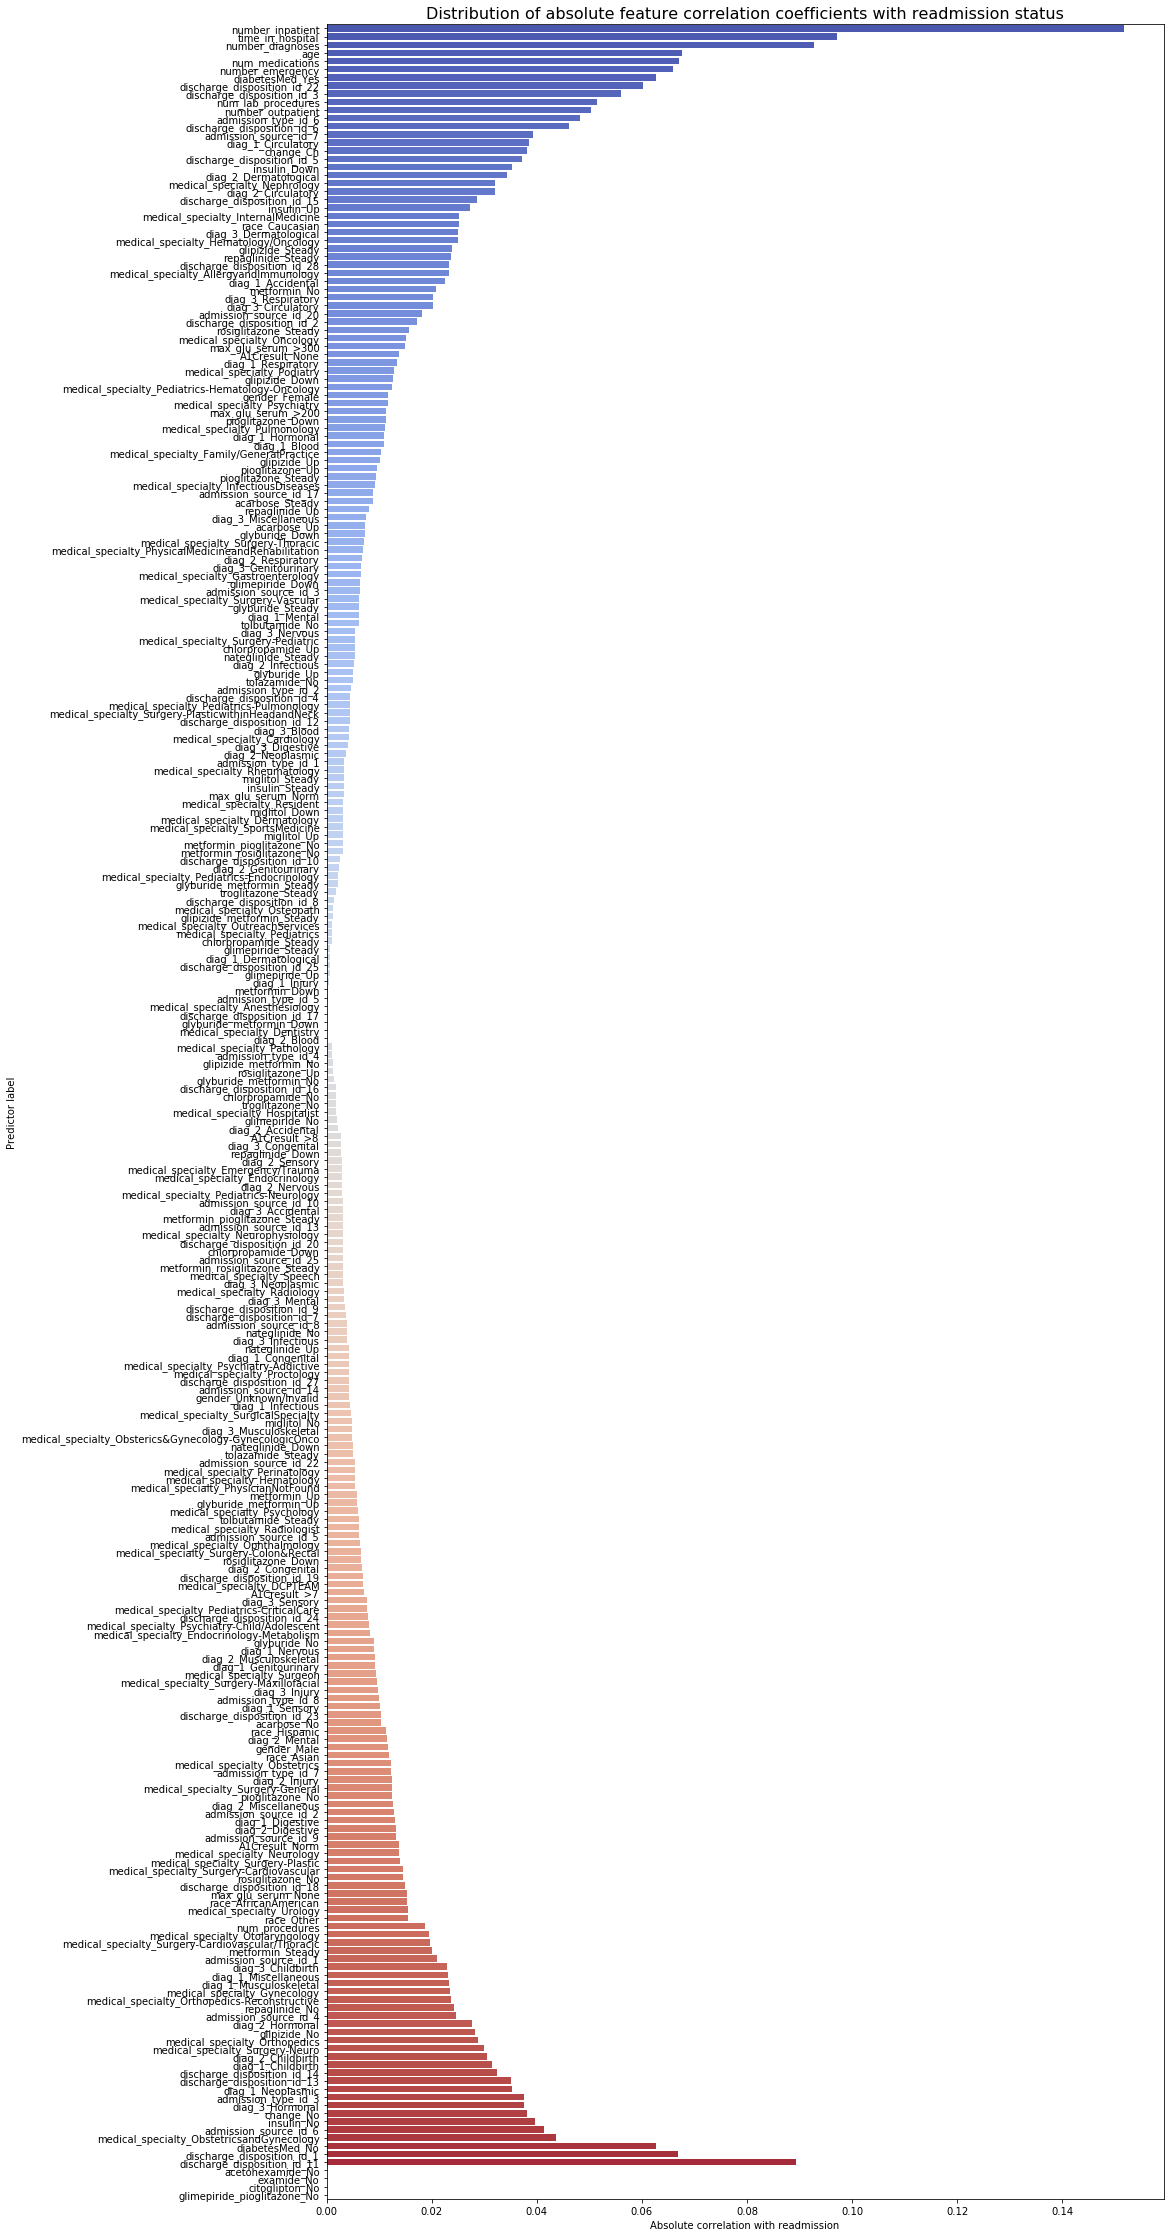

In [27]:
plt.figure(figsize=(15,40))
abs_corr_coef = abs(correlations_df.ix[correlations_df.columns.drop('readmitted'),'readmitted'].sort_values())
sns.barplot(abs_corr_coef, abs_corr_coef.index, orient='h', palette=sns.color_palette('coolwarm', len(abs_corr_coef)))
plt.ylabel('Predictor label'); plt.xlabel('Absolute correlation with readmission');
plt.title('Distribution of absolute feature correlation coefficients with readmission status', size=16);

NaN values here correspond to features with only one level - there can't be a correlation between a constant and a variable...

One of the most informative aspects of the correlation coefficients was that they were all very small (p<0.1), which suggested to me it would be difficult to isolate factors that influence the reponse (as opposed to noisy factors). This chart also made it immediately apparent which features would probably prove most useful in discriminating between response classes - age, number_inpatient, number_diagnoses, and the a patients' usage of diabetes medication.

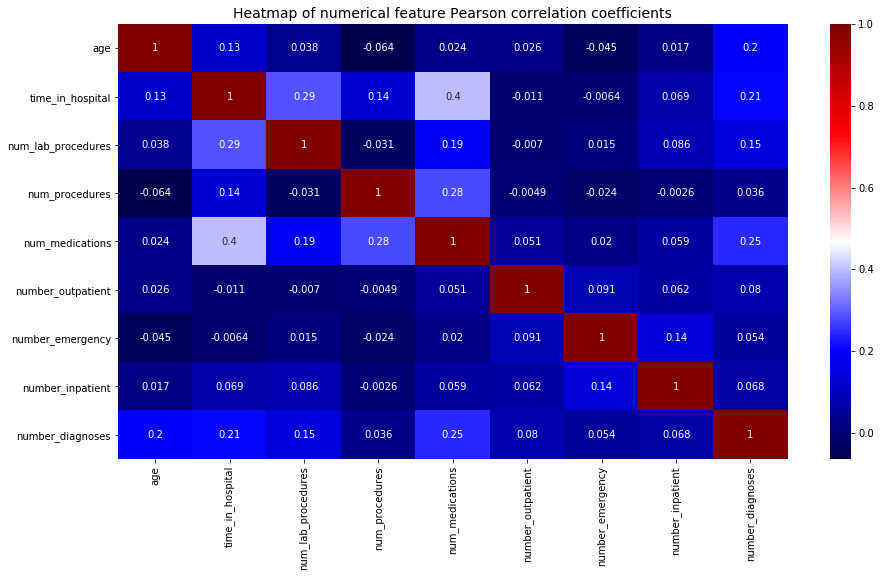

In [28]:
num_features_corr = Dataset['Large OHE'][num_features].corr()
plt.figure(figsize=(15,8))
sns.heatmap(num_features_corr, annot=True, cmap='seismic')
plt.xticks(rotation=90); plt.title('Heatmap of numerical feature Pearson correlation coefficients', size=14);

This heatmap showed that there was some considerable (in the context of this dataset) collinearity between features, which suggested to me that applying a dimensionality reduction technique was a good idea. Collinear features are undesirable because they make estimates of a parametric model's coefficients less accurate.

Before moving on to dimensionality reduction, I demonstrated some differences between patients from each readmission class, and discuss possible explanations for these differences. I focused on examining the features that were strongly correlated (in this context) with readmission.


readmitted = 0 -> readmitted within 30 days 
readmitted = 1 -> readmitted in more than 30 days 
readmitted = 2 -> Not readmitted / no record of readmission

3.1. Influence of number of inpatient encounters on readmission class

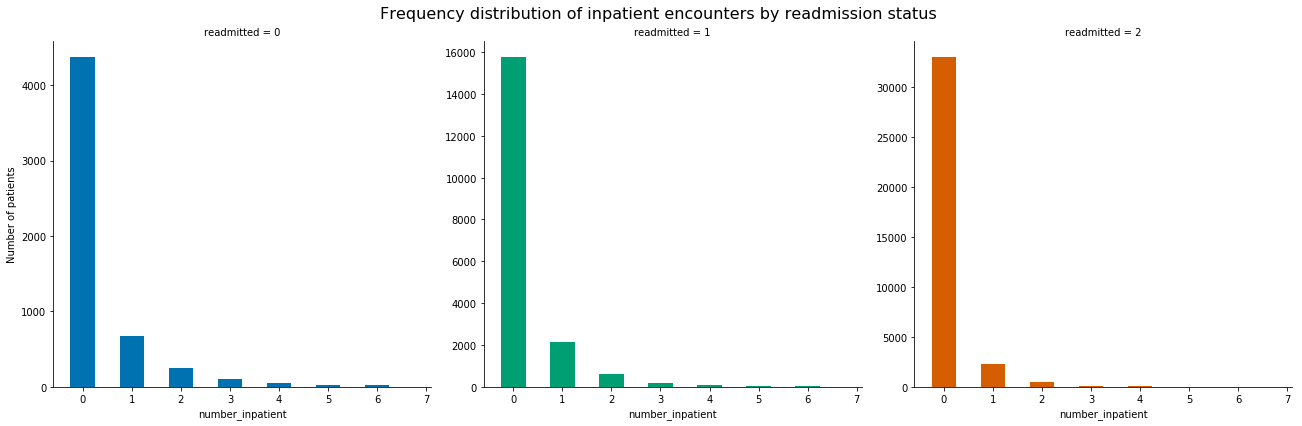

In [29]:
g = sns.FacetGrid(Dataset['Trimmed'], col="readmitted", subplot_kws={'alpha':1}, size=6,
                  sharey=False, palette='colorblind',hue='readmitted')  
g.map(sns.distplot, "number_inpatient", kde=False, hist_kws={'width':0.5, 'alpha':1, 'align':'mid'},
      bins=np.arange(-0.25,7.25,1));
g.axes[0][0].set_ylabel('Number of patients')
plt.suptitle('Frequency distribution of inpatient encounters by readmission status', size=16);
plt.subplots_adjust(top=0.9);

These distributions appeared outwardly to be very similar - most patients typically hadn't visited previously as an inpatient, and a negligible number had more than 4 or 5 visits in their record. Note however, that a greater proportion of patients that were readmitted had at least some history of readmission - all bins greater than 0 are more heavily populated in the readmitted = True chart than in its False counterpart.

Additionally, the number_inpatient feature wasn't strongly correlated with the other features that were covariant with readmission, so I expected it to feature prominently in the supervised fits later.

3.2. Influence of length of visit on readmission
Contradistinctively, time_in_hospital, the feature with the second-strongest correlation with readmission was strongly correlated with other features. Let's see how patients of different readmission classes were distributed within this feature.

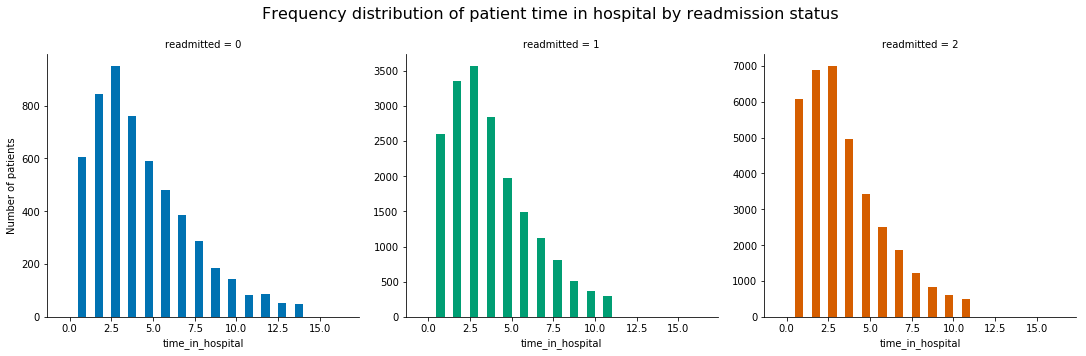

In [30]:
g = sns.FacetGrid(Dataset['Trimmed'], col="readmitted", subplot_kws={'alpha':1}, size=5, sharey=False, palette='colorblind',
                  hue='readmitted')  
g.map(sns.distplot, "time_in_hospital", kde=False, hist_kws={'width':0.5, 'alpha':1}, bins=np.arange(-0.5,17));
g.axes[0][0].set_ylabel('Number of patients')
plt.suptitle('Frequency distribution of patient time in hospital by readmission status', size=16);
plt.subplots_adjust(top=0.85);

The difference here is quite immediately clear - patients that were readmitted tended to spend longer in hospital. 

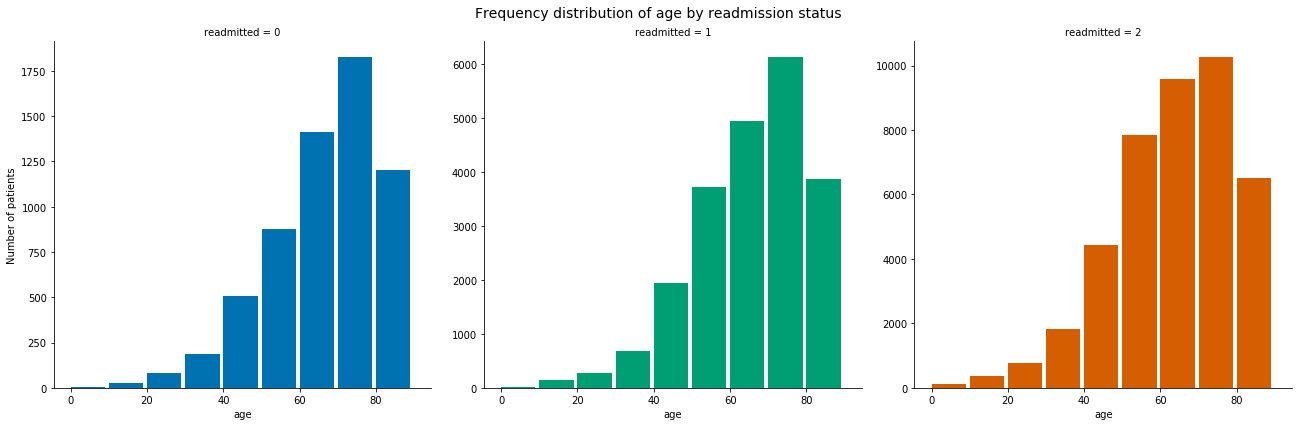

In [31]:
g = sns.FacetGrid(Dataset['Aggregated diagnoses'], col="readmitted", subplot_kws={'alpha':1}, size=6, sharey=False,
                  palette='colorblind',hue='readmitted')  
g.map(sns.distplot, "age", kde=False, hist_kws={'width':9, 'alpha':1}, bins=np.arange(0,100,10));
g.axes[0][0].set_ylabel('Number of patients')
plt.suptitle('Frequency distribution of age by readmission status', size=14);
plt.subplots_adjust(top=0.9);

The steeper distribution on the right indicated both a markedly higher mean age for readmitted patients, as well as a smaller spread of ages about that mean age. A patient that has been readmitted was likely to be older than a patient that was not readmitted. This statement was reflected by the mean age of a patient in either class, as illustrated in the boxplot below.

A broader point to mention here is the under-representation of young people in the dataset - given that type 2 diabetes is about nine times more prevalent than type 1 diabetes, and that type 2 diabetes typically affects the middle-aged and elderly, this observation bears explanation.

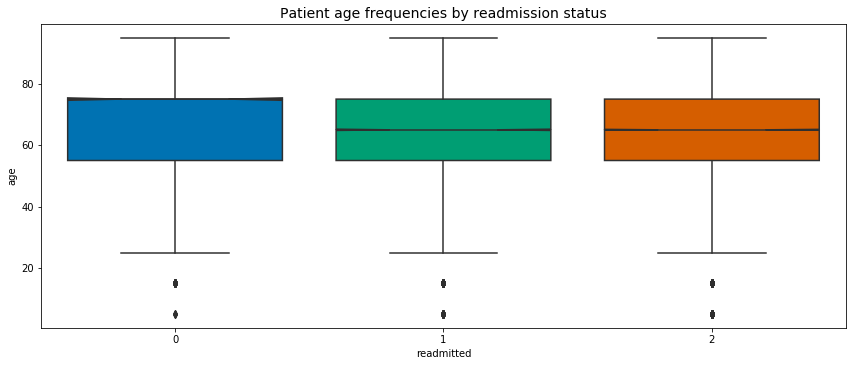

In [32]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='readmitted', y='age', data=Dataset['Encoded response'], palette='colorblind', notch=True, saturation=1)
plt.tight_layout()
plt.title('Patient age frequencies by readmission status', size=14);

Which diagnosis was most common among the patients?

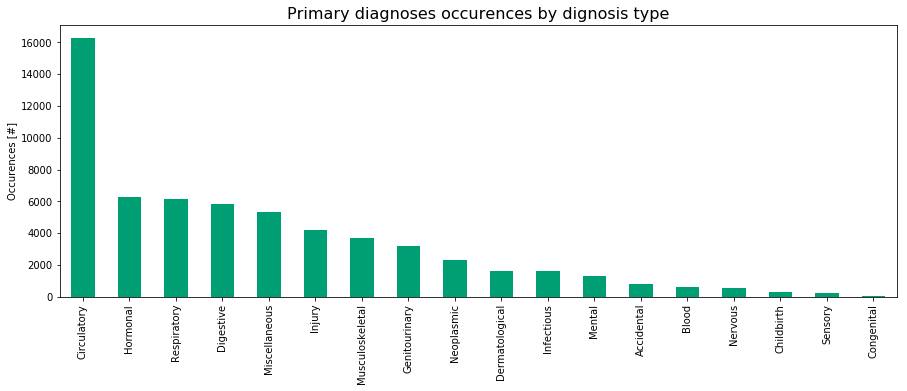

In [33]:
plt.figure(figsize=(15,5))
Dataset['Trimmed'].diag_1.value_counts().plot(color=sns.color_palette('colorblind')[1], kind='bar', rot=90);
plt.title('Primary diagnoses occurences by dignosis type', size=16);
plt.ylabel('Occurences [#]');

We can see that circulatory diseases have a substantial lead. Given that cardiovascular disease and kidney disease are more prevalent among diabetics and that this dataset was built out of records for which some form of diabetes was entered as a diagnosis, it seems reasonable that these would be among the most common primary diagnoses.

In [34]:
# Response class centroid pairwise distances
Dataset['Scaled'] = pd.DataFrame(scale(Dataset['Large OHE']), index=Dataset['Large OHE'].index, columns=Dataset['Large OHE'].columns)

centroid_0 = Dataset['Scaled'].loc[Dataset['Large OHE'].readmitted == 0, :].mean()
centroid_1 = Dataset['Scaled'].loc[Dataset['Large OHE'].readmitted == 1, :].mean()
centroid_2 = Dataset['Scaled'].loc[Dataset['Large OHE'].readmitted == 2, :].mean();

euclidean(centroid_1, centroid_2) # '>30 days' and 'No' were slightly closer

1.704878525260768

In [35]:
euclidean(centroid_0, centroid_1) # but EDA suggested '<30 days' and '>30 days' were closer for the most important features

1.7225849687568773

It (almost) goes without saying that the responses were imbalanced; this was a cause for consternation, and it was serendipitous that they were somewhat rebalanced by merging readmitted = {<30, >30}. To have a clearer conscience, I chose the optimisation metric and class-weighting hyperparameters to reflect this fact.

In [36]:
# 3 different datasets to test classifier performances on
Dataset['Large supervised'] = Dataset['Large OHE'].copy() # Includes all features
Dataset['Filtered supervised'] = Dataset['Large OHE'].copy() # Will undergo filtering
Dataset['Dense supervised'] = Dataset['Trimmed'][np.concatenate((num_features, ['readmitted']), 0)] # Only includes num. features

In [37]:
# Create a binary response - readmitted = {True, False}, removed > 30 days
for prefix in ['Large', 'Filtered', 'Dense']:
    set_label = prefix + ' supervised'
    Dataset[set_label].loc[Dataset[set_label].readmitted == 0, 'readmitted'] = 1 # {0, 1} -> {1}
    Dataset[set_label].loc[Dataset[set_label].readmitted == 2, 'readmitted'] = 0 # {2} -> {0}


/Users/yupster2/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/yupster2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/yupster2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [38]:
# Split filtered data into predictors and response
X = Dataset['Filtered supervised'].loc[:, Dataset['Filtered supervised'].columns.drop('readmitted')]
y = Dataset['Filtered supervised'].loc[:, 'readmitted']

In [39]:
# One-hot encode predictors
ohe_features = pd.get_dummies(X[X.columns.drop(num_features)])
X = X[num_features].join(ohe_features)

In [40]:
# Split all datasets into training and testing subsets
Training = {}; Testing = {};

(Training['O_Filtered'], Testing['O_Filtered'],
Training['R_Filtered'], Testing['R_Filtered']) = train_test_split(X, y, random_state=0)

(Training['O_Large'], Testing['O_Large'],
 Training['R_Large'], Testing['R_Large'] ) = train_test_split(Dataset['Large supervised'].drop('readmitted',axis=1),
                                                                Dataset['Large supervised'].readmitted, random_state=0)

(Training['O_Dense'], Testing['O_Dense'],
 Training['R_Dense'], Testing['R_Dense'] ) = train_test_split(Dataset['Dense supervised'].drop('readmitted',axis=1),
                                                                Dataset['Dense supervised'].readmitted, random_state=0)

## Dimensionality reduction
EDA exposed the fact that some of the features most strongly correlated with readmission were collinear. Principal component analysis transforms the coordinate system so that all features are orthogonal and axes are ranked in order of how much variance they account for. Collinear features inflate the errors on estimates of regression coefficients, although this shouldn't be a problem here as we have a large dataset. Instead, principal component analysis is useful as a means of filtering out noise from the dataset. If noise is normally distributed for all features, then the high-dimensional position for a datapoint of given features will also be normally distributed about some nominal position. Consequently, principal components in direction of high variance will have a higher signal to noise ratio than those in directions of low variance. It is this line of reasoning that I exploited to filter noise from the dataset.

In [41]:
opt_metric = metrics.make_scorer(metrics.matthews_corrcoef) # Will be explained later

Scaling had to be performed on all three datasets because it's an assumption of linear discriminant analysis, is necessary for PCA to produce a relevant result, and attributes even weight to all features under KNN classification. It's not necessary for logistic regression.

In [42]:
pca = PCA()
ss = StandardScaler()

for set_label in ['Large', 'Filtered', 'Dense']:
    obs_label = 'O_'+set_label
    Training[obs_label] = pd.DataFrame(ss.fit_transform(Training[obs_label]), index=Training[obs_label].index,
                                            columns=Training[obs_label].columns)
    Testing[obs_label] = pd.DataFrame(ss.fit_transform(Testing[obs_label]), index=Testing[obs_label].index,
                                         columns=Testing[obs_label].columns)

pc_labels = ['PC_'+str(i) for i in range(0,len(Training['O_Filtered'].columns))]
Training['O_Filtered'] = pd.DataFrame(pca.fit_transform(Training['O_Filtered']),
                                      index=Training['O_Filtered'].index, columns=pc_labels)
Testing['O_Filtered'] = pd.DataFrame(pca.transform(Testing['O_Filtered']), index=Testing['O_Filtered'].index,
                                     columns=pc_labels)

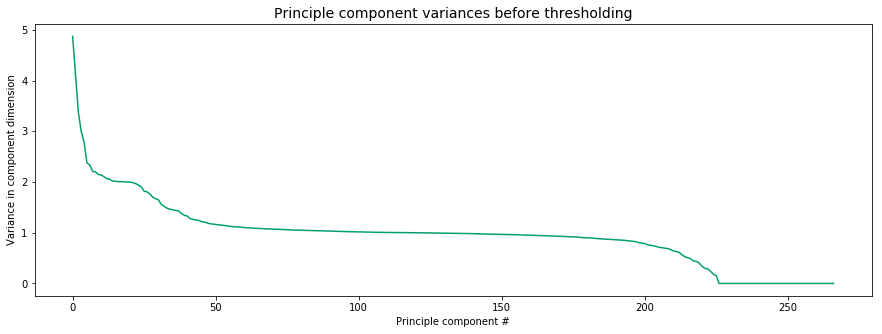

In [43]:
# Examine initial distribution of principal component variances
vt = VarianceThreshold()
vt.fit(Training['O_Filtered'])
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,len(Training['O_Filtered'].columns)),pd.Series(vt.variances_), color=sns.color_palette('colorblind')[1])
plt.xlabel('Principle component #'); plt.ylabel('Variance in component dimension');
plt.title('Principle component variances before thresholding', size=14);

In [44]:
# Create a function to examine how a classifier's behaviour changes with the number of components
def optimise_variance_threshold(classifier, X, y, max_variance, increment, scoring_metric, min_variance=0):
    scores = []
    for current_threshold in np.arange(min_variance, max_variance, increment):
        vt_0 = VarianceThreshold(threshold=current_threshold)
        X_vt = pd.DataFrame(vt_0.fit_transform(X), index=X.index)
        variance_score = cross_val_score(classifier, X_vt, y, scoring=scoring_metric)
        scores.append(variance_score.mean())
    return scores

By optimising a LDA classifier against datasets containing all PCs with at least a certain variance, I hoped to remove 'noisy' components that didn't contribute anything to the classifier's form. LDA chooses a direction that maximizes class separation, so I reasoned that a LDA classifier's Matthews correlation coefficient score would indicate how that direction is being computed - if it didn't change, then the data in the components removed did not contribute to distinguishing the classes, and was therefore noise.

In [45]:
variance_mcc_scores = optimise_variance_threshold(LinearDiscriminantAnalysis(), Training['O_Filtered'],
                                                  Training['R_Filtered'], scoring_metric=opt_metric, max_variance=3,
                                                  increment=0.05, min_variance=0.01)

/Users/yupster2/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


No handlers could be found for logger "matplotlib.legend"


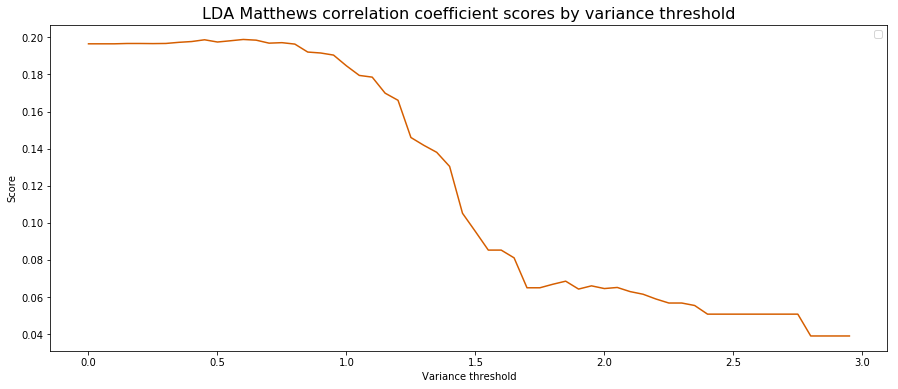

In [46]:
plt.figure(figsize=(15,6));
plt.plot(np.arange(0, 3, 0.05), variance_mcc_scores, color=sns.color_palette('colorblind')[2])
plt.xlabel('Variance threshold'); plt.ylabel('Score'); plt.title('LDA Matthews correlation coefficient scores by variance threshold', size=16);
plt.legend()
plt.show()

We can see that the classifier is unaffected up until components with a variance greater than 0.6 are removed, where its score peters downward. This indicates the axis chosen according to linear discriminant analysis isn't being affected by the principal components with a variance less than about 0.6. Consequently, I thought it was reasonable to remove them.

In [47]:
# Remove noisy components
vt_0 = VarianceThreshold(threshold=0.6)
Training['O_Filtered'] = pd.DataFrame(vt_0.fit_transform(Training['O_Filtered']), index=Training['O_Filtered'].index)
Testing['O_Filtered'] = pd.DataFrame(vt_0.transform(Testing['O_Filtered']), index=Testing['O_Filtered'].index)

column_labels = ['PC_'+str(i) for i in range(0, len(Training['O_Filtered'].columns))]
Training['O_Filtered'].columns = column_labels
Testing['O_Filtered'].columns = column_labels

In [48]:
Training['O_Filtered'].shape

(45258, 213)

## Clustering
Unsupervised learning is a potentially endless endeavor, so I chose to focus on two activities:

Clustering on the entire dataset, with visualisations of the first two PCs.
Distilling high-dimensional forms in the data down into two dimensions using t-SNE, then seeing what readmission rates were like in different clusters.
I began by creating a dataset containing all observations.

In [49]:
Dataset['Unsupervised'] = pd.concat([Training['O_Filtered'].loc[:,:],
                                     Testing['O_Filtered'].loc[:,:]])

pc_50_labels = ['PC_'+str(j) for j in range(0, 51)]

# Some algorithms used demand alot of memory, so we'll need to use a smaller dataset for those
chosen_indices = np.random.choice(Dataset['Unsupervised'].index, 1000, replace=False)
Dataset['Unsupervised small'] = Dataset['Unsupervised'].ix[chosen_indices, pc_50_labels]

/Users/yupster2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


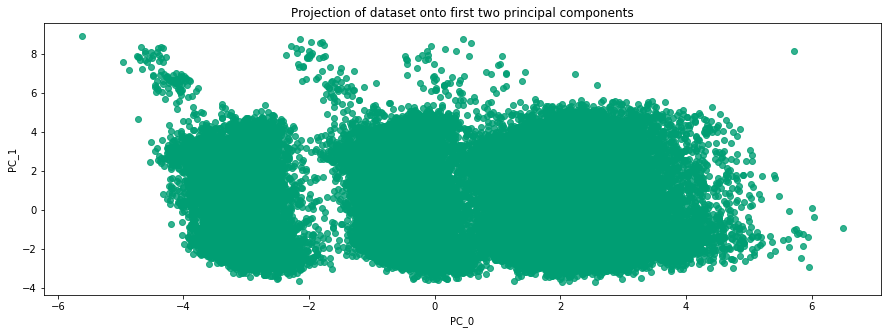

In [50]:
plt.figure(figsize=(15,5))
sns.regplot(x='PC_0', y='PC_1', data=Dataset['Unsupervised'], color=sns.color_palette('colorblind')[1], fit_reg=False);
plt.title('Projection of dataset onto first two principal components');

It appears there are three primary clusters - one especially large one on the left, and two identically shaped smaller ones on the right. 

We used k-means clustering to split the dataset into the clusters identified above. We noted that k-means will tend to extract clusters of similar sizes, which meant that we had to perform the operation twice - once to split the dataset into the large leftward and coupled right clusters, then again to split the coupled clusters.

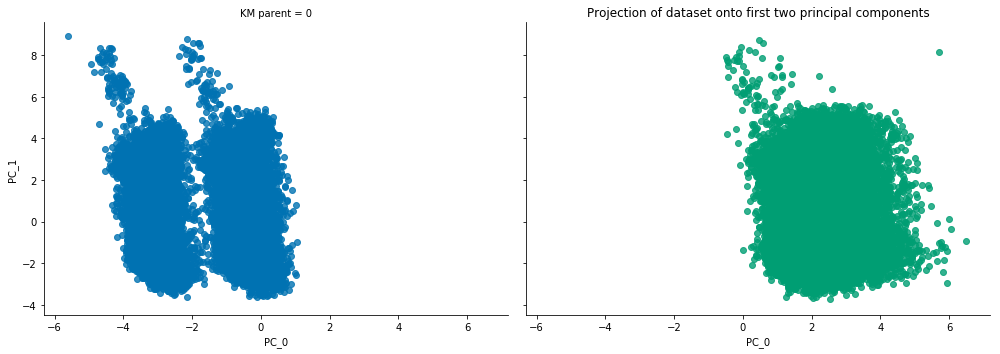

In [51]:
KMClusterers = {} # what an inelegant word
KMClusterers['Parent'] = KMeans(n_clusters=2, random_state=0, max_iter=300)

Clusters = {}
Clusters['KM parent'] = pd.Series(KMClusterers['Parent'].fit_predict(Dataset['Unsupervised']),
                              index=Dataset['Unsupervised'].index, name='KM parent')

sns.lmplot(x='PC_0', y='PC_1', col='KM parent', data=Dataset['Unsupervised'].join(Clusters['KM parent']), palette='colorblind',
           hue='KM parent', fit_reg=False, size=5, aspect=1.4);
plt.title('Projection of dataset onto first two principal components');


Next we took the two smaller clusters in the left-hand panel and repeat the clustering operation, making the differences between the two clusters irreconcilable.

In [52]:
Dataset['Unsupervised KM subset'] = Dataset['Unsupervised'].loc[Clusters['KM parent']==0, :]

In [53]:
KMClusterers['Child'] = KMeans(n_clusters=2, random_state=0, max_iter=300)
Clusters['KM child'] = pd.Series(KMClusterers['Child'].fit_predict(Dataset['Unsupervised KM subset']),
                                 index=Dataset['Unsupervised KM subset'].index, name='KM child');

All that remains is to combine the two sets of clusters and visualize the result.

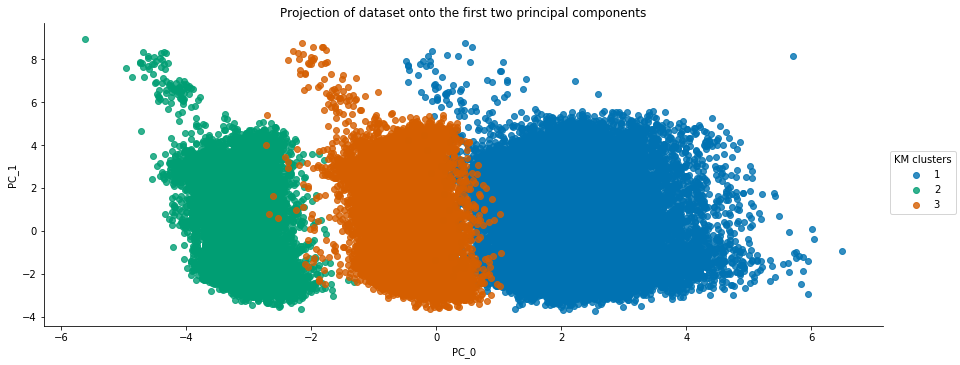

In [54]:
Clusters['KM'] = Clusters['KM child'] + 2 
Clusters['KM'] = pd.concat([Clusters['KM'],
               Clusters['KM parent'].loc[Clusters['KM parent'].index.drop(Clusters['KM child'].index)]],
               axis=0)
Clusters['KM'].name = 'KM clusters'

sns.lmplot(x='PC_0', y='PC_1', data=Dataset['Unsupervised'].join(Clusters['KM']),
           palette='colorblind', hue='KM clusters', fit_reg=False, size=5, aspect=2.5);
plt.title('Projection of dataset onto the first two principal components');

We ended up with three nicely partitioned clusters.

## t-SNE
t-SNE is a method of mapping a dataset which has a form in many dimensions into a dataset with a form in two dimensions. 

In [ ]:
#initialization 1
for p in np.arange(1, 101, 5):
    tsne = TSNE(n_components=2, perplexity=p, random_state=0, early_exaggeration=10, init='pca')
    Dataset['t-SNE p='+str(p)] = pd.DataFrame(tsne.fit_transform(Dataset['Unsupervised small']),
                                                 index = Dataset['Unsupervised small'].index,
                                                 columns=['Axis 0', 'Axis 1'])

In [ ]:
#initialization 2
f, ax = plt.subplots(4, 5, sharex=False, sharey=False, figsize=(16,14))
for i, k in enumerate(np.arange(1,101, 5)):
    j = int(i/5)
    i = i - (int(i/5)*5)
    Dataset['t-SNE p='+str(k)].plot(kind='scatter', x='Axis 0', y='Axis 1',
                                    ax=ax[j, i], color=sns.cubehelix_palette(20, start=.5, rot=-.75)[int(k/5)])
    ax[j,i].set_title('p = '+str(k))
    
plt.tight_layout()

Visually inspecting the data, a perplexity of about 56 brought out distinct clusters in the data, so we chose to use this value to proceed with clustering.

In [57]:
Dataset['t-SNE'] = Dataset['t-SNE p=56']

We chose to cluster the dataset using the DBSCAN algorithm, which doesn't require the number of clusters to be stipulated beforehand. To apply it effectively, we needed to make an informed choice of the eps hyperparameter.

Distances distribution 1

Text(0,0.5,u'Frequency')

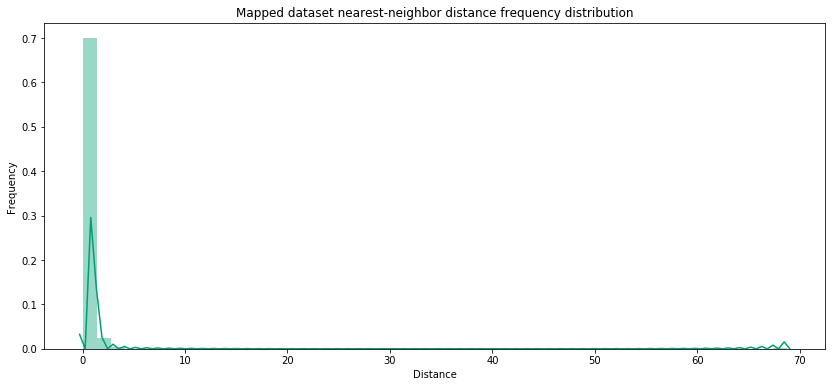

In [58]:
#distances distribution 2
distances = pairwise_distances(Dataset['t-SNE'])
neighbor_distances = [np.min(row[np.nonzero(row)]) for row in distances]

plt.figure(figsize=(14, 6))
sns.distplot(neighbor_distances, color=sns.color_palette('colorblind')[1]);
plt.title('Mapped dataset nearest-neighbor distance frequency distribution');
plt.xlabel('Distance'); plt.ylabel('Frequency')

We wanted an eps value such that there were between 2 and 10 major clusters formed, which meant it was necessary that eps was big enough for relatively close points to be clustered, but not so big that visibly discrete clusters were merged.

In [62]:
nb_clusters = []
for eps_value in np.arange(0.1, 10, 0.01):
    db = DBSCAN(eps=eps_value, min_samples=20)
    Clusters['DB'] = pd.Series(db.fit_predict(Dataset['t-SNE']), index=Dataset['t-SNE'].index, name='DBSCAN clusters')
    nb_clusters.append(len(Clusters['DB'].unique()))

After iterating through several min_samples, we decided that classifying a core point on the basis of whether it had 10 points within a radius eps of it seemed reasonable; this was because it allowed the 'stable' regions of the graph to be discerned easily.

We can see from the graph that the number of clusters rises then falls with increasing eps. The small number of clusters to the left of the peak is explained by the fact that for a small eps, most points will be classified as outliers. To the right of the peak, a large eps value means that the majority of points are being classified as core points, implying that few clusters will be formed because most points are directly reachable from many other points. We were interested in clustering as many points as reasonably possible, so we chose to use a larger eps value that brough out 5 clusters - eps=2.5.

In [63]:
db = DBSCAN(eps=2.21, min_samples=20, random_state=0)
Clusters['DB'] = pd.Series(db.fit_predict(Dataset['t-SNE']), index=Dataset['t-SNE'].index, name='DBSCAN clusters')

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [ ]:
Dataset['t-SNE with clusters'] = Dataset['t-SNE'].join(Clusters['DB'])

In [ ]:
outlier_palette = [(0.8, 0.8, 0.8)];
outlier_palette = outlier_palette + sns.color_palette('spectral', n_colors=9)

sns.lmplot(data=Dataset['t-SNE with clusters'],
           x='Axis 0', y='Axis 1', hue='DBSCAN clusters', palette=outlier_palette,
          size=5, aspect=1, fit_reg=False);

In [ ]:
cluster_counts_df = pd.DataFrame()
for cluster_nb in Clusters['DB'].unique():
    cluster_indices = (Clusters['DB'][Clusters['DB']==cluster_nb]).index
    cluster_counts = normalised_value_counts(Dataset['Encoded response'].loc[cluster_indices,'readmitted'])
    cluster_counts = cluster_counts.append(pd.Series(len(cluster_indices), index=['foo'], name='bar'))
    cluster_counts.name = 'Cluster '+str(cluster_nb)
    cluster_counts_df = pd.concat([cluster_counts_df, cluster_counts], axis=1)

priors = normalised_value_counts(Dataset['Encoded response'].loc[Clusters['DB'].index,'readmitted'])
priors.name = 'Priors'
cluster_counts_df = pd.concat([cluster_counts_df, priors], axis=1)
cluster_counts_df.index = ['No', '>30 days', '<30 days', 'Nb. points in cluster']
pd.set_option('max_columns',15)
round(cluster_counts_df,2)

We can see that the patients of different readmission classes are not evenly distributed between the clusers, potentially providing a route to improved patient classification by feeding clusters into different supervised classifiers.

## Deployment

Hemoglobin A1c (HbA1c) is an important measure of glucose control, which is widely applied to measure performance of diabetes care. The measurement of HbA1c at the time of hospital admission offers a unique opportunity to assess the efficacy of current therapy and to make changes in that therapy if indicated (e.g., HbA1c > 8.0% on current regimen). 

We considered four groups of encounters: (1) no HbA1c test performed, (2) HbA1c performed and in normal range, (3) HbA1c performed and the result is greater than 8% with no change in diabetic medications, and (4) HbA1c performed, result is greater than 8%, and diabetic medication was changed.

The statistical model suggests that the relationship between the probability of readmission and the HbA1c measurement depends on the primary diagnosis. The data suggest further that the greater attention to diabetes reflected in HbA1c determination may improve patient outcomes and lower cost of inpatient care.

In conclusion, the decision to obtain a measurement of HbA1c for patients with diabetes mellitus is a useful predictor of readmission rates which may prove valuable in the development of strategies to reduce readmission rates and costs for the care of individuals with diabetes mellitus. The profile of readmission differed significantly in patients where Hba1c was checked in the setting of a primary diabetes diagnosis, when compared to those with a primary circulatory disorder. While readmission rates remained the highest for patients with circulatory diagnoses, readmission rates for patients with diabetes appeared to be associated with the decision to test for HbA1c, rather than the values of the HbA1c result.

## What could improve analysis?

- Experimentation with more sophisticated nonlinear classification algorithms than KNN (e.g. random forest);

- Trying to improve classification performance via boosting;

- Could have chosen to remove readmitted = >30 days patients entirely to make the problem more sharply defined, possibly better revealing where the differences between <30 days and not readmitted patients lay;

- Exploring the clusters extracted by t-SNE in more depth;

- Feature engineering, specifically creation and use of interaction features;

- Focus of analysis - choosing to study only patients with diabetes mellitus for example, or only looking at a particular demographic, or investigating the influence of one factor on readmission rates.

## Exceptional Work
We hope that our Principal Components Analysis and our Linear Discriminate Analysis will qualify as Exceptional Work.  We spent many hours processing data and researching the methods employed.